In [2]:
import numpy as np
import pandas as pd
import scipy.linalg as slg
import matplotlib.pyplot as plt
import matplotlib as mpl

In [12]:
a = np.arange(5)
a = a.reshape((1,5))

In [16]:
b = a.reshape((5,1))

In [25]:
b.dot(a)

array([[ 0,  0,  0,  0,  0],
       [ 0,  1,  2,  3,  4],
       [ 0,  2,  4,  6,  8],
       [ 0,  3,  6,  9, 12],
       [ 0,  4,  8, 12, 16]])

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

In [55]:
ints = np.linspace(0, 10000, 10000)

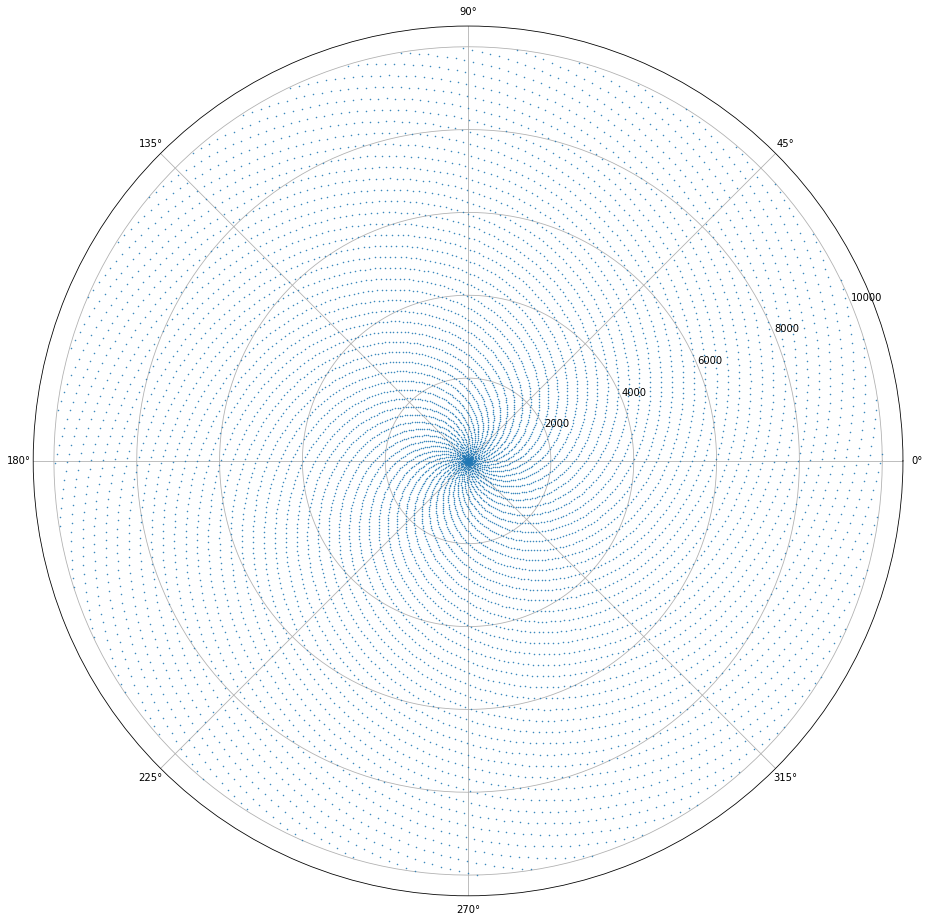

In [56]:
plt.figure(figsize=(16,16))
plt.polar(ints, ints, 'o', markersize=0.5)

# Boto3

In [57]:
import boto3
from IPython.display import display_json
from IPython.display import JSON

In [58]:
boto_session = boto3.Session()

In [59]:
boto_session.get_available_services()
boto_session.get_available_regions('lightsail')
boto_session.get_available_resources()

['cloudformation',
 'cloudwatch',
 'dynamodb',
 'ec2',
 'glacier',
 'iam',
 'opsworks',
 's3',
 'sns',
 'sqs']

In [67]:
boto3.setup_default_session(region_name='us-east-1')
client = boto3.client('lightsail')

In [63]:
client.get_instance(instanceName='AWSLightsail-Ubuntu')

{'instance': {'name': 'AWSLightsail-Ubuntu',
  'arn': 'arn:aws:lightsail:us-west-2:616263549301:Instance/017a8fc4-7296-4259-92f5-c031a7560ce5',
  'supportCode': '962392921815/i-051288e2ea30769ac',
  'createdAt': datetime.datetime(2019, 1, 16, 16, 58, 12, 332000, tzinfo=tzlocal()),
  'location': {'availabilityZone': 'us-west-2a', 'regionName': 'us-west-2'},
  'resourceType': 'Instance',
  'tags': [{'key': 'Locale', 'value': 'US-Oregon-West-2'},
   {'key': 'Project', 'value': 'knoconida.com'},
   {'key': 'OS', 'value': 'Ubuntu 18.04 LTS'},
   {'key': 'HWinfo', 'value': '1vCPU 1GB 40GB 2TB'}],
  'blueprintId': 'ubuntu_18_04',
  'blueprintName': 'Ubuntu',
  'bundleId': 'micro_2_0',
  'isStaticIp': True,
  'privateIpAddress': '172.26.5.192',
  'publicIpAddress': '35.164.223.56',
  'hardware': {'cpuCount': 1,
   'disks': [{'createdAt': datetime.datetime(2019, 1, 16, 16, 58, 12, 332000, tzinfo=tzlocal()),
     'sizeInGb': 40,
     'isSystemDisk': True,
     'iops': 120,
     'path': '/dev/sda

In [69]:
client.get_domain(domainName='knoconida.com')

{'domain': {'name': 'knoconida.com',
  'arn': 'arn:aws:lightsail:global:616263549301:Domain/38ded8bb-6689-4e01-8f36-62ead4f4d808',
  'supportCode': '962392921815//hostedzone/Z10IASTFQQNOKK',
  'createdAt': datetime.datetime(2019, 1, 16, 17, 3, 56, 271000, tzinfo=tzlocal()),
  'location': {'availabilityZone': 'all', 'regionName': 'global'},
  'resourceType': 'Domain',
  'tags': [],
  'domainEntries': [{'id': '1440397719',
    'name': 'knoconida.com',
    'target': '35.164.223.56',
    'isAlias': False,
    'type': 'A'},
   {'id': '-1035106764',
    'name': 'knoconida.com',
    'target': 'ns-1122.awsdns-12.org',
    'isAlias': False,
    'type': 'NS'},
   {'id': '-1436767764',
    'name': 'knoconida.com',
    'target': 'ns-1965.awsdns-53.co.uk',
    'isAlias': False,
    'type': 'NS'},
   {'id': '567757138',
    'name': 'knoconida.com',
    'target': 'ns-848.awsdns-42.net',
    'isAlias': False,
    'type': 'NS'},
   {'id': '20304465',
    'name': 'knoconida.com',
    'target': 'ns-40.aw

In [ ]:
aws --region us-east-1 lightsail get-domain --domain-name knoconida.com

In [ ]:
aws --region us-east-1 lightsail create-domain-entry --domain-name knoconida.com --domain-entry name="jia.knoconida.com",target="35.164.223.56",isAlias=false,type="A"

In [ ]:
aws --region us-east-1 lightsail delete-domain-entry --domain-name knoconida.com --domain-entry id="2087774743",name="bootstrap.knoconida.com",target="35.164.223.56",isAlias=false,type="A"

In [ ]:
aws --region us-east-1 lightsail delete-domain-entry --domain-name knoconida.com --domain-entry  id="81039803",name="ocf.knoconida.com",target="35.164.223.56",isAlias=false,type="A"

## APIs

https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/lightsail.html

allocate_static_ip()
attach_disk()
attach_instances_to_load_balancer()
attach_load_balancer_tls_certificate()
attach_static_ip()
can_paginate()
close_instance_public_ports()
copy_snapshot()
create_cloud_formation_stack()
create_disk()
create_disk_from_snapshot()
create_disk_snapshot()
create_domain()
create_domain_entry()
create_instance_snapshot()
create_instances()
create_instances_from_snapshot()
create_key_pair()
create_load_balancer()
create_load_balancer_tls_certificate()
create_relational_database()
create_relational_database_from_snapshot()
create_relational_database_snapshot()
delete_auto_snapshot()
delete_disk()
delete_disk_snapshot()
delete_domain()
delete_domain_entry()
delete_instance()
delete_instance_snapshot()
delete_key_pair()
delete_known_host_keys()
delete_load_balancer()
delete_load_balancer_tls_certificate()
delete_relational_database()
delete_relational_database_snapshot()
detach_disk()
detach_instances_from_load_balancer()
detach_static_ip()
disable_add_on()
download_default_key_pair()
enable_add_on()
export_snapshot()
generate_presigned_url()
get_active_names()
get_auto_snapshots()
get_blueprints()
get_bundles()
get_cloud_formation_stack_records()
get_disk()
get_disk_snapshot()
get_disk_snapshots()
get_disks()
get_domain()
get_domains()
get_export_snapshot_records()
get_instance()
get_instance_access_details()
get_instance_metric_data()
get_instance_port_states()
get_instance_snapshot()
get_instance_snapshots()
get_instance_state()
get_instances()
get_key_pair()
get_key_pairs()
get_load_balancer()
get_load_balancer_metric_data()
get_load_balancer_tls_certificates()
get_load_balancers()
get_operation()
get_operations()
get_operations_for_resource()
get_paginator()
get_regions()
get_relational_database()
get_relational_database_blueprints()
get_relational_database_bundles()
get_relational_database_events()
get_relational_database_log_events()
get_relational_database_log_streams()
get_relational_database_master_user_password()
get_relational_database_metric_data()
get_relational_database_parameters()
get_relational_database_snapshot()
get_relational_database_snapshots()
get_relational_databases()
get_static_ip()
get_static_ips()
get_waiter()
import_key_pair()
is_vpc_peered()
open_instance_public_ports()
peer_vpc()
put_instance_public_ports()
reboot_instance()
reboot_relational_database()
release_static_ip()
start_instance()
start_relational_database()
stop_instance()
stop_relational_database()
tag_resource()
unpeer_vpc()
untag_resource()
update_domain_entry()
update_load_balancer_attribute()
update_relational_database()
update_relational_database_parameters()
allocate_static_ip(**kwargs)¶

# PySpark

In [7]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
import pyspark
import pyspark.sql.functions as F
from pyspark.sql.types import DoubleType, StringType, ArrayType

In [9]:
import scipy

In [10]:
scipy.version.version

'1.3.1'

# Keras

In [1]:
import keras

Using TensorFlow backend.


In [2]:
keras.__version__

'2.3.1'

# Tensorflow

## GPU Checking

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.0.0'

In [3]:
tf.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None)

True

In [4]:

tf.test.is_gpu_available()

True

In [6]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3041916848817596406
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 4939015782
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7567116353425460276
physical_device_desc: "device: 0, name: GeForce GTX 1060, pci bus id: 0000:02:00.0, compute capability: 6.1"
]


In [31]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [47]:
dir(tf)

['AggregationMethod',
 'Assert',
 'CriticalSection',
 'DType',
 'DeviceSpec',
 'GradientTape',
 'Graph',
 'IndexedSlices',
 'IndexedSlicesSpec',
 'Module',
 'Operation',
 'OptionalSpec',
 'RaggedTensor',
 'RaggedTensorSpec',
 'RegisterGradient',
 'SparseTensor',
 'SparseTensorSpec',
 'Tensor',
 'TensorArray',
 'TensorArraySpec',
 'TensorShape',
 'TensorSpec',
 'TypeSpec',
 'UnconnectedGradients',
 'Variable',
 'VariableAggregation',
 'VariableSynchronization',
 '_LazyLoader',
 '__builtins__',
 '__cached__',
 '__compiler_version__',
 '__cxx11_abi_flag__',
 '__doc__',
 '__file__',
 '__git_version__',
 '__loader__',
 '__monolithic_build__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_absolute_import',
 '_api',
 '_division',
 '_forward_module',
 '_importlib',
 '_m',
 '_print_function',
 '_root_estimator',
 '_sys',
 '_top_level_modules',
 '_types',
 'abs',
 'acos',
 'acosh',
 'add',
 'add_n',
 'argmax',
 'argmin',
 'argsort',
 'as_dtype',
 'as_string',
 'asin',

- https://medium.com/@ab9.bhatia/set-up-gpu-accelerated-tensorflow-keras-on-windows-10-with-anaconda-e71bfa9506d1

In [6]:
import numpy as np
import tensorflow as tf
from datetime import datetime

devices = ['/device:CPU:0', '/device:GPU:0']
shapes = [(100, 100), (500, 500), (1000, 1000), (5000, 5000), (10000, 10000)]

def compute_operations(device, shape):
    start_time = datetime.now()
    with tf.device(device):
        random_matrix = tf.random.uniform(shape=shape, minval=0, maxval=1)
        dot_operation = tf.matmul(random_matrix, tf.transpose(random_matrix))
        sum_operation = tf.reduce_sum(dot_operation)
    elapsed_time = datetime.now() - start_time

    return sum_operation, elapsed_time

In [7]:
for device in devices:
    print("--" * 20)
    for shape in shapes:
        sums, time_taken = compute_operations(device, shape)
        # Print the result and also the time taken on the selected device
        print("Input shape:", shape, 
              "using Device:", device, 
              "with sums:", sums,
              "took: {:.2f}".format(time_taken.seconds + time_taken.microseconds/1e6))

----------------------------------------
Input shape: (100, 100) using Device: /device:CPU:0 with sums: tf.Tensor(249921.22, shape=(), dtype=float32) took: 0.00
Input shape: (500, 500) using Device: /device:CPU:0 with sums: tf.Tensor(31210060.0, shape=(), dtype=float32) took: 0.00
Input shape: (1000, 1000) using Device: /device:CPU:0 with sums: tf.Tensor(249820050.0, shape=(), dtype=float32) took: 0.02
Input shape: (5000, 5000) using Device: /device:CPU:0 with sums: tf.Tensor(31249150000.0, shape=(), dtype=float32) took: 1.43
Input shape: (10000, 10000) using Device: /device:CPU:0 with sums: tf.Tensor(250018480000.0, shape=(), dtype=float32) took: 9.67
----------------------------------------
Input shape: (100, 100) using Device: /device:GPU:0 with sums: tf.Tensor(256214.92, shape=(), dtype=float32) took: 0.20
Input shape: (500, 500) using Device: /device:GPU:0 with sums: tf.Tensor(31344928.0, shape=(), dtype=float32) took: 0.00
Input shape: (1000, 1000) using Device: /device:GPU:0 wit

# Pytorch

## GPU Checking

In [10]:
import torch

In [11]:
torch.__version__, torch.version.cuda

('1.3.0', '10.1')

In [12]:
torch.cuda.is_available(), torch.cuda.get_device_name(), torch.cuda.get_device_properties(torch.cuda.current_device())

(True,
 'GeForce GTX 1060',
 _CudaDeviceProperties(name='GeForce GTX 1060', major=6, minor=1, total_memory=6144MB, multi_processor_count=10))

# KNN Demo

In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

## Prepare Dataset

In [ ]:
filename='Social_Network_Ads.csv'
rds = pd.read_csv(f'Data/{filename}')

In [ ]:
X=rds[['Age', 'EstimatedSalary']].values
Y=rds['Purchased'].values

## Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [ ]:
sc = StandardScaler()

In [ ]:
X_train, X_test = sc.fit_transform(X_train), sc.transform(X_test)

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
classifier.fit(X_train, Y_train)

## Testing

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
Y_pred = classifier.predict(X_test)

In [ ]:
cm = confusion_matrix(Y_test, Y_pred)

In [ ]:
cm

## Viz

In [ ]:
fig = go.Figure(data=go.Bar(y=[2, 3, 1]))

In [ ]:
fig.write_html('IMG/plotly_helloworld.html', auto_open=True)

# LR

In [ ]:
import pandas as pd
import numpy as np

## Prepare Dataset

In [ ]:
filename='Salary_Data.csv'
rds = pd.read_csv(f'Data/{filename}')

In [ ]:
import plotly.express as px
fig = px.scatter(rds,x="YearsExperience", y="Salary")
fig.show(renderer='iframe')

In [ ]:
X=rds['YearsExperience'].values
Y=rds['Salary'].values

## Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [ ]:
X_train.reshape(1,-1)

In [ ]:
X_train.reshape(1,-1).shape, X_train.shape

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train.reshape(-1,1), Y_train.reshape(-1,1))

## Testing

In [ ]:
Y_pred = regressor.predict(X_test.reshape(-1,1))
Y_pred

In [ ]:
Y_pred.flatten()

## Viz

In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [ ]:
fig = go.Figure()
# fig.add_trace(go.Scatter(x=X, y=Y, mode='markers+lines', name='Raw'))
fig.add_trace(go.Scatter(x=X_train, y=Y_train, mode='markers', name='Train'))
fig.add_trace(go.Scatter(x=X_test, y=Y_test, mode='markers', name='Test'))
fig.add_trace(go.Scatter(x=X_test, y=Y_pred.flatten(), mode='markers+lines', name='Predict'))
fig.update_layout(title_text="Linear Regression Model",)
fig.update_xaxes(title_text='Experience By Year')
fig.update_yaxes(title_text='Salary')
fig.show(renderer='iframe')

# MLR

In [ ]:
import pandas as pd
import numpy as np

## Prepare Dataset

In [ ]:
filename='50_Startups.csv'
rds = pd.read_csv(f'Data/{filename}')

In [ ]:
X=rds.iloc[:,:-1].values
Y=rds.iloc[:,-1].values.reshape(-1,1)

In [ ]:
cities = rds.iloc[:,-2]
cities.unique()

In [ ]:
X.shape, Y.shape

## Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import
from sklearn.linear_model import LinearRegression

In [ ]:
labelencoder = LabelEncoder()
X[:,3] = labelencoder.fit_transform(X[:,3])

In [ ]:
onehotencoder = OneHotEncoder(categorical_features=[3])
X0 = onehotencoder.fit_transform(X).toarray()

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X0[:,1:], Y, test_size=0.2)

In [ ]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

## Testing

In [ ]:
Y_pred = regressor.predict(X_test)
Y_pred, Y_test

In [ ]:
X

## Viz

In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [ ]:
rds.columns

In [ ]:
[f"{i:<5.2f}" for i in Y_pred.flatten()]

In [ ]:
fig = go.Figure()
# fig.add_trace(go.Scatter(x=X, y=Y, mode='markers+lines', name='Raw'))
fig.add_trace(go.Scatter3d(x=X_train[:, -1], 
                           y=X_train[:, -2], 
                           z=X_train[:, -3],
                           hovertemplate="MS:%{x} <br>RD:%{y} <br>AD:%{z}",
                           marker=dict(size=12, 
                                       color = Y_pred.flatten(),                                    
                                       colorscale='Viridis',   # choose a colorscale
                                       showscale=True,
                                       opacity=0.8),                           
                           mode='markers',
                          name='Predict'))

fig.update_layout(title_text="Multi Linear Regression Model", 
                  scene={"aspectmode": "cube", 
                         "xaxis": {"title": "Marketing Spend"},
                       "yaxis": {"title": "R&D Spend" },
                       "zaxis": {"title": "Administration"}})

fig.show(renderer='iframe')
go.Scatter3d()

# Decision Tree

## Prepare Data

In [ ]:
filename='adult_dataset.csv'
rds = pd.read_csv(f'Data/{filename}')

In [ ]:
rds_cat = rds.select_dtypes(include=['object'])
rds_bool = rds_cat.apply(lambda elem: elem=='?', axis=0)
rds_bool['dropable'] = rds_bool.any(axis=1)

In [ ]:
ds1 = rds.drop(rds_cat.columns, axis = 1)[~rds_bool['dropable']]
ds1_cat = rds_cat[~rds_bool['dropable']]

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
ds_cat = ds1_cat.apply(labelencoder.fit_transform)
ds = pd.concat([ds1, ds_cat], axis=1)
ds['income'] = ds['income'].astype('category')

In [ ]:
X=ds.drop('income', axis=1)
Y=ds['income']

In [ ]:
rds

## Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [ ]:
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, Y_train)

## Testing

In [ ]:
Y_pred_default = dt_default.predict(X_test)

In [ ]:
print(classification_report(Y_test, Y_pred_default))

In [ ]:
print(confusion_matrix(Y_test, Y_pred_default))

In [ ]:
print(accuracy_score(Y_test, Y_pred_default))

In [ ]:
Y.name

## Viz

In [ ]:
from sklearn.tree import export_graphviz
from IPython.core.display import display, HTML
from dtreeviz.trees import *

In [ ]:
viz = dtreeviz(dt_default, X_train=X_train, 
               y_train=Y_train,
               feature_names=X.columns.to_list(), 
               target_name='income',
               class_names =['<=50K', '>50K']   ,
               fancy=False)

In [ ]:
viz.view()  

# End